# Lecture 1:  Numerical Integrals and Derivatives

**Overview:**
* Numerical integration.
* Numerical derivatives.
---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

### Functions to integrate, and some exact results

In [2]:
def Gaussian(x,amp,mean,std_dev):
    """
    A Gaussian function,unnormalized
    """
    f = amp*np.exp(-1*((x - mean)**2/(2*std_dev**2))) 
    return f

def polynomial(x,args):
    
    """
    A general polynomial the order of which is determined by the size
    of the array of coefficients
    Arguments:
    x -- vector of x values
    args -- an array of coeficients, the size of this array determines the order
    of the polynomial
    example: polynomial(x,[2,3]) will generate the line: f(x) = 2 + 3x
    """
    f = 0*x
    for (i,a) in enumerate(args): # i is the count, a is the value
        f += a*x**(i)
    
    return f


def Fermi(x):
    """
    Define a function from physics that might give numerical integrators or differentiators
    some trouble
    """
    num = 1/np.sqrt(x)
    den = np.exp(x)+1
    return num/den


# add white noise to a function
def add_noise(A,f):
    """
    Adds white (Gaussian distributed) noise to a function
    
    Arguments:
    A -- width of the noise distribution, think of it like the amplitude of the noise
    f - an array of values to add noise to, these represent some function 
    """
    
    noise = np.random.normal(0,A,np.size(f))
    
    return f + noise
    

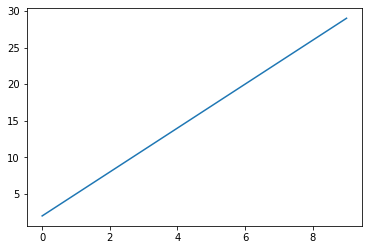

In [4]:
x = np.arange(10)
f = polynomial(x, [2,3])
plt.plot(x, f)

### Define a set of methods for taking numerical integrals. 

In [7]:
# Numerical Integration methods

def riemannSum(f, start, stop, N):
    """
    A simple riemann sum integrator
    
    Arguments:
    f - A function to integrate, the function must take a single argument that is an independent
    variable
    start - lower limit of integral
    stop - upper limit of integral
    N - number of steps 
    """
    
    range = stop - start
    h = range/N
    x = np.arange(start, stop+h, h)

    return np.sum(f(x)) * h

def Simpson(f, start, stop, N):
    """
    A simple Simpson's rule integrator
    
    Arguments:
    f - A function to integrate, the function must take a single argument that is an independent
    variable
    start - lower limit of integral
    stop - upper limit of integral
    N - number of steps (must be an even number)
    """
    
    width = stop - start
    h = width/N
    x = np.arange(start, stop+h, h)
    
    s = f(start) + f(stop) 
    return (2*f(x[2:-2:2]).sum() + 4*f(x[1:-2:2]).sum()+s) * h/3


def trapz(f, start, stop, N):
    """
    A trapezoidal rule integrator. Helper function to adaptive_trapz.
    
    Arguments:
    f - A function to integrate, the function must take a single argument that is an independent
    variable
    start - lower limit of integral
    stop - upper limit of integral
    N - number of steps
    """
    
    width = stop - start
    h = width / N
    x = np.arange(start, stop + h, h)
    
    s = 0.5 * (f(start) + f(stop))
    return (f(x[1:-2]).sum() + s) * h

def adaptive_trapz(f,start, stop, epsilon):
    """
    Write an adaptive trapezoidal integrator here
    
    Arguments:
    f - a function to integrate, the function must take a single argument 
    start - lower limit of integral
    stop - upper limit of integral
    epsilon - error tolerance
    """
    
    N = 10
    error = 100
    width = stop - start
    
    f2 = trapz(f, start, stop, N)
    
    while error > epsilon:
        f1 = f2
        N = 2 * N
        h = width / N
        x = np.arange(start, stop + h, h)
        f2 = (0.5 * f1) + (h * f(x[0:-2:2] + start))
        error = (f2 - f1) / 3
    
    print(N)
    print(error)
    return f2


[ 0  1  2  3  4  5  6  7  8  9 10]
[0 2 4 6 8]
[ 5  7  9 11 13]
5
6


### Define a set of methods for taking numerical derivatives.

In [8]:
#numerical derivatives

def forward_diff(x,f):
    """
    Take a derivative using the forward difference scheme
    Arguments:
    x - an array of independent values
    f - an array of dependent values i.e y = f(x)
    """
    d = (f[1:] - f[:-1])/np.diff(x)
    return d
    
def backward_diff(x,f):
    """
    Take a derivative using the backwards difference scheme
    Arguments:
    x - an array of independent values
    f - an array of dependent values i.e y = f(x)
    """
    d = (f[:-1] - f[1:])/np.diff(x)
    return d

# implement a central difference formula
def central_diff(x,f):
    
    d = 1
    return d

### Tasks
1. Use the `riemannSum` and `Simpsons` methods above to integrate some polynomical functions of various orders. Try playing around with different numbers of steps. Can you obtain machine precision? 
2. Examine the help file for `integrate.trapz`, `integrate.simps`. and `integrate.quad`. Try comparing these routines to those you write yourself.
3. Write a method to perform an adaptive trapezoidal integral as discussed in the lectures. How does your method compare with scipy's `integrate.quad`? Can you obtain the same accuaracy? For a given accuarcy, what method is faster and/or what method requires more iterations?
4. Try adding noise to a function and then integrating. How does the addition of noise affect the precision of the integral?
5. Write a method to calculate numerical derivatives using central difference formulas. Compare the forward, backwards, and central difference methods for taking derivatives of various polynomials.
6. Simulate some experimental data by generating a periodic function (sin, cos, etc) time series and adding noise. Then try taking the derivative of this data using forward, backward, and central difference methods. Find the step size values where forward/backward difference methods become more accurate than a central difference method by comparing your numerical derivatives with the analytical results.

Riemann sum with 100 steps: 1.446825
Simpson's method with 100 steps: 1.3521107333333333
Riemann sum with 1000 steps: 1.41966825
Simpson's method with 1000 steps: 1.4100213106733335
Scipy integrator: 1.4166666682547595


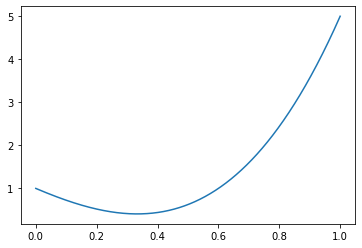

In [23]:
# TASK 1

x = np.linspace(0, 1, 1000)
my_poly = lambda x: polynomial(x, [1, -3, 2, 5])
q = polynomial(x, [1, -3, 2, 5])
plt.plot(x, q)



print("Riemann sum with 100 steps: " + str(riemannSum(my_poly, 0, 1, 100)))
print("Simpson's method with 100 steps: " + str(Simpson(my_poly, 0, 1, 100)))
print("Riemann sum with 1000 steps: " + str(riemannSum(my_poly, 0, 1, 1000)))
print("Simpson's method with 1000 steps: " + str(Simpson(my_poly, 0, 1, 1000)))

print("Adaptive trapezoidal with 1000 steps:")

print("Scipy integrator: " + str(integrate.simps(q, x)))



In [16]:
? integrate.simpson

Signature:  integrate.simpson(y, x=None, dx=1, axis=-1, even='avg')
Docstring:
Integrate y(x) using samples along the given axis and the composite
Simpson's rule. If x is None, spacing of dx is assumed.

If there are an even number of samples, N, then there are an odd
number of intervals (N-1), but Simpson's rule requires an even number
of intervals. The parameter 'even' controls how this is handled.

Parameters
----------
y : array_like
    Array to be integrated.
x : array_like, optional
    If given, the points at which `y` is sampled.
dx : int, optional
    Spacing of integration points along axis of `x`. Only used when
    `x` is None. Default is 1.
axis : int, optional
    Axis along which to integrate. Default is the last axis.
even : str {'avg', 'first', 'last'}, optional
    'avg' : Average two results:1) use the first N-2 intervals with
              a trapezoidal rule on the last interval and 2) use the last
              N-2 intervals with a trapezoidal rule on the first in

In [21]:
# TASK 2

#? integrate.trapezoid
#? integrate.simpson
#? integrate.quad

### Example usage of some functions above

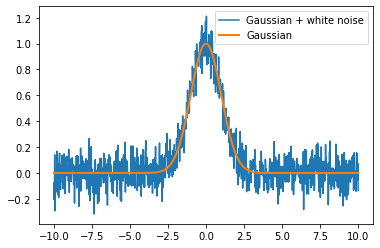

In [11]:
# Generate array of x-values
x = np.linspace(-10,10,1000)

# Generate Gaussian function, add noise, and plot
G = Gaussian(x, 1, 0,1)
noisy_G = add_noise(0.1, G)
plt.plot(x, noisy_G, label = "Gaussian + white noise")
plt.plot(x, G, label = "Gaussian", lw = 2)
plt.legend()

In [ ]:
# using Scipy's built in integration schemes
# integrate a Gaussian with mean=0, amplitude=1, and standard deviation of 1 
# over a range of -100 to 100
# there are many options and ouput arguments for this function
scipyIntegral = integrate.quad(Gaussian, -100.0, 100.0, args = (1,0,1))

# exact integral of a Gaussian: Amp 1, standard deviation = 1
analyticalIntegral = np.sqrt(2*np.pi)

# Integrate a gaussian
print("Exact integral = ", analyticalIntegral)
print("SciPy Integral = ", scipyIntegral[0], "+/-", scipyIntegral[1])